# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

# 3. Homework - work with your own data

In [145]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [146]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

print("Path to dataset files:", path)


Path to dataset files: /Users/pablopena/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1


In [147]:
# Load USREC.csv dataset
df_usrec = pd.read_csv("USREC.csv")

print("USREC dataset loaded successfully!")
print(f"Shape: {df_usrec.shape}")
print(f"\nFirst few rows:")
df_usrec.head()


USREC dataset loaded successfully!
Shape: (2054, 2)

First few rows:


,observation_date,USREC
0,1854-12-01,1
1,1855-01-01,0
2,1855-02-01,0
3,1855-03-01,0
4,1855-04-01,0


In [148]:
# Load FRED-MD dataset (Monthly Economic Data from Federal Reserve)
df_fred_md = pd.read_csv("FRED DATASET current")

print("FRED-MD dataset loaded successfully!")
print(f"Shape: {df_fred_md.shape}")

# Load appendix to get column descriptions
# Use latin-1 encoding to handle special characters in the file
appendix = pd.read_csv("FRED-MD Appendix/FRED-MD_updated_appendix.csv", encoding='latin-1')

# Create mapping from FRED code to description
# Keep 'sasdate' as is, map others to their descriptions
column_mapping = {'sasdate': 'Date'}
for idx, row in appendix.iterrows():
    fred_code = row['fred']
    if fred_code in df_fred_md.columns:
        # Use shorter description if available, otherwise use full description
        if 'gsi:description' in appendix.columns:
            short_desc = appendix.loc[idx, 'gsi:description']
            if pd.notna(short_desc) and short_desc:
                column_mapping[fred_code] = short_desc
            else:
                column_mapping[fred_code] = row['description']
        else:
            column_mapping[fred_code] = row['description']

# Rename columns
df_fred_md = df_fred_md.rename(columns=column_mapping)

print(f"\nColumns renamed using appendix.")
print(f"\nFirst few rows:")
df_fred_md.head()


FRED-MD dataset loaded successfully!
Shape: (804, 127)

Columns renamed using appendix.

First few rows:


,Date,PI,PI less transfers,Real Consumption,M&T sales,Retail sales,IP: total,IP: products,IP: final prod,IP: cons gds,...,PCE defl: nondble,PCE defl: service,AHE: goods,AHE: const,AHE: mfg,Consumer expect,N.A.,N.A.,N.A.,VIX
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1,1/1/1959,2583.560,2426.0,15.188,276676.8154,17689.23968,21.9998,23.6312,22.5507,32.1377,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2,2/1/1959,2593.596,2434.8,15.346,278713.9773,17819.01912,22.4306,23.9501,22.7461,32.3734,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3,3/1/1959,2610.396,2452.7,15.491,277775.2539,17967.91336,22.7538,24.0951,22.8577,32.3734,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4,4/1/1959,2627.446,2470.0,15.435,283362.7075,17978.97983,23.2384,24.4431,23.1926,32.8841,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN


In [149]:
# Check what files are in the Kaggle dataset
import os
print("Files in the dataset:")
for file in os.listdir(path):
    print(f"  - {file}")


Files in the dataset:
  - credit_risk_dataset.csv


In [150]:
# Load the credit risk dataset
# Assuming there's a CSV file in the dataset
dataset_files = os.listdir(path)
csv_files = [f for f in dataset_files if f.endswith('.csv')]

if csv_files:
    # Load the first CSV file found
    credit_file = os.path.join(path, csv_files[0])
    df_credit = pd.read_csv(credit_file)
    print(f"Loaded: {csv_files[0]}")
    print(f"Shape: {df_credit.shape}")
    print(f"\nFirst few rows:")
    df_credit.head()
else:
    print("No CSV files found in the dataset")


Loaded: credit_risk_dataset.csv
Shape: (32581, 12)

First few rows:


## Exploratory Data Analysis - USREC Dataset


In [151]:
# 1. Use describe() and info() to analyze the USREC data
print("=== USREC Dataset Info ===")
df_usrec.info()
print("\n=== USREC Dataset Describe ===")
df_usrec.describe()
print("\n=== First few rows ===")
df_usrec.head(10)


=== USREC Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   observation_date  2054 non-null   object
 1   USREC             2054 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 32.2+ KB

=== USREC Dataset Describe ===

=== First few rows ===


,observation_date,USREC
0,1854-12-01,1
1,1855-01-01,0
2,1855-02-01,0
3,1855-03-01,0
4,1855-04-01,0
5,1855-05-01,0
6,1855-06-01,0
7,1855-07-01,0
8,1855-08-01,0
9,1855-09-01,0


In [152]:
# 2. Check for duplicate rows in USREC
duplicate_rows_usrec = df_usrec[df_usrec.duplicated(keep=False)]
print(f"Number of duplicate rows in USREC: {len(duplicate_rows_usrec)}")
if len(duplicate_rows_usrec) > 0:
    print("\nDuplicate rows:")
    print(duplicate_rows_usrec)
else:
    print("No duplicate rows found.")


Number of duplicate rows in USREC: 0
No duplicate rows found.


In [153]:
# 3. Check for null values in USREC
print("Number of null values per column in USREC:")
print(df_usrec.isnull().sum())
print(f"\nTotal null values: {df_usrec.isnull().sum().sum()}")
if df_usrec.isnull().sum().sum() > 0:
    print("\nRows with null values:")
    print(df_usrec[df_usrec.isnull().any(axis=1)])


Number of null values per column in USREC:
observation_date    0
USREC               0
dtype: int64

Total null values: 0


In [154]:
# 4. Convert observation_date to datetime and check for inconsistencies
df_usrec['observation_date'] = pd.to_datetime(df_usrec['observation_date'])
print("Date range in USREC dataset:")
print(f"Earliest date: {df_usrec['observation_date'].min()}")
print(f"Latest date: {df_usrec['observation_date'].max()}")
print(f"\nUSREC values summary:")
print(f"Recession periods (USREC=1): {df_usrec['USREC'].sum()}")
print(f"Non-recession periods (USREC=0): {(df_usrec['USREC']==0).sum()}")
print(f"\nClass distribution:")
print(df_usrec['USREC'].value_counts())


Date range in USREC dataset:
Earliest date: 1854-12-01 00:00:00
Latest date: 2026-01-01 00:00:00

USREC values summary:
Recession periods (USREC=1): 579
Non-recession periods (USREC=0): 1475

Class distribution:
USREC
0    1475
1     579
Name: count, dtype: int64


## Exploratory Data Analysis - Credit Risk Dataset


In [155]:
# 1. Use describe() and info() to analyze the credit risk data
print("=== Credit Risk Dataset Info ===")
df_credit.info()
print("\n=== Credit Risk Dataset Describe ===")
df_credit.describe(include='all')
print("\n=== First few rows ===")
df_credit.head(10)


=== Credit Risk Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ M

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [156]:
# 2. Check for duplicate rows in credit risk dataset
duplicate_rows_credit = df_credit[df_credit.duplicated(keep=False)]
print(f"Number of duplicate rows in credit risk dataset: {len(duplicate_rows_credit)}")
if len(duplicate_rows_credit) > 0:
    print(f"\nFirst 5 duplicate rows:")
    print(duplicate_rows_credit.head())
else:
    print("No duplicate rows found.")


Number of duplicate rows in credit risk dataset: 330

First 5 duplicate rows:
     person_age  person_income person_home_ownership  person_emp_length  \
14           23         115000                  RENT                2.0   
238          22         183000              MORTGAGE                3.0   
252          24          85000                  RENT                5.0   
591          26          20000              MORTGAGE                5.0   
740          21          21600                   OWN                NaN   

    loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
14    EDUCATION          A      35000           7.90            0   
238   EDUCATION          A       1000            NaN            0   
252     MEDICAL          B      25000          10.62            0   
591     MEDICAL          A       4800           5.99            0   
740     VENTURE          A       7125           6.99            0   

     loan_percent_income cb_person_default_on_file  cb_p

In [157]:
# 3. Check for null values in credit risk dataset
print("Number of null values per column in credit risk dataset:")
null_counts = df_credit.isnull().sum()
print(null_counts[null_counts > 0])
if null_counts.sum() > 0:
    print(f"\nTotal null values: {null_counts.sum()}")
    print("\nPercentage of null values per column:")
    print((null_counts[null_counts > 0] / len(df_credit) * 100).round(2))
else:
    print("No null values found.")


Number of null values per column in credit risk dataset:
person_emp_length     895
loan_int_rate        3116
dtype: int64

Total null values: 4011

Percentage of null values per column:
person_emp_length    2.75
loan_int_rate        9.56
dtype: float64


In [158]:
# 4. Check for duplicate values in key columns (where duplicates would be inappropriate)
# Check for duplicate IDs or unique identifiers if they exist
print("Checking for duplicate values in columns where they should be unique:")
for col in df_credit.columns:
    if 'id' in col.lower() or 'ID' in col or 'customer' in col.lower():
        unique_count = df_credit[col].nunique()
        total_count = len(df_credit)
        if unique_count < total_count:
            print(f"\n{col}: {total_count - unique_count} duplicate values found")
            print(f"  Total: {total_count}, Unique: {unique_count}")
            # Show first example of duplicate
            duplicates = df_credit[df_credit[col].duplicated(keep=False)]
            if len(duplicates) > 0:
                print(f"  Example duplicate value: {duplicates[col].iloc[0]}")
                print(f"  Rows with this value:")
                print(df_credit[df_credit[col] == duplicates[col].iloc[0]].head(3))


Checking for duplicate values in columns where they should be unique:


In [159]:
# 5. Calculate mean, median, and mode for numeric columns
print("=== Statistical Summary for Numeric Columns ===")
numeric_cols = df_credit.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  Mean: {df_credit[col].mean():.2f}")
    print(f"  Median: {df_credit[col].median():.2f}")
    mode_result = df_credit[col].mode()
    if len(mode_result) > 0:
        print(f"  Mode: {mode_result.iloc[0]} (appears {df_credit[col].value_counts().iloc[0]} times)")
    else:
        print(f"  Mode: No mode (all values are unique)")


=== Statistical Summary for Numeric Columns ===

person_age:
  Mean: 27.73
  Median: 26.00
  Mode: 23 (appears 3889 times)

person_income:
  Mean: 66074.85
  Median: 55000.00
  Mode: 60000 (appears 1046 times)

person_emp_length:
  Mean: 4.79
  Median: 4.00
  Mode: 0.0 (appears 4105 times)

loan_amnt:
  Mean: 9589.37
  Median: 8000.00
  Mode: 10000 (appears 2664 times)

loan_int_rate:
  Mean: 11.01
  Median: 10.99
  Mode: 7.51 (appears 756 times)

loan_status:
  Mean: 0.22
  Median: 0.00
  Mode: 0 (appears 25473 times)

loan_percent_income:
  Mean: 0.17
  Median: 0.15
  Mode: 0.1 (appears 1533 times)

cb_person_cred_hist_length:
  Mean: 5.80
  Median: 4.00
  Mode: 2 (appears 5965 times)


In [160]:
# 6. Check for inconsistent data in credit risk dataset
# Check for negative values where they shouldn't exist
print("=== Checking for Data Inconsistencies ===")
numeric_cols = df_credit.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    negative_count = (df_credit[col] < 0).sum()
    if negative_count > 0:
        print(f"\n{col}: {negative_count} negative values found")
        print(f"  Examples:")
        print(df_credit[df_credit[col] < 0][col].head())

# Check date columns if they exist
date_cols = df_credit.select_dtypes(include=['object']).columns
for col in date_cols:
    if 'date' in col.lower():
        print(f"\nChecking {col} for date inconsistencies...")
        try:
            dates = pd.to_datetime(df_credit[col], errors='coerce')
            invalid_dates = dates.isnull().sum()
            if invalid_dates > 0:
                print(f"  {invalid_dates} invalid dates found")
            future_dates = (dates > pd.Timestamp.now()).sum()
            if future_dates > 0:
                print(f"  {future_dates} future dates found")
        except:
            print(f"  Could not parse {col} as dates")


=== Checking for Data Inconsistencies ===


In [161]:
# 7. Check for categorical variables and class imbalance
print("=== Categorical Variables Analysis ===")
categorical_cols = df_credit.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df_credit[col].value_counts()
    print(f"  Unique values: {df_credit[col].nunique()}")
    print(f"  Value counts:")
    print(value_counts.head(10))
    if len(value_counts) > 1:
        # Check for class imbalance
        max_count = value_counts.iloc[0]
        min_count = value_counts.iloc[-1]
        imbalance_ratio = max_count / min_count
        if imbalance_ratio > 10:
            print(f"  ⚠️  Class imbalance detected! Ratio: {imbalance_ratio:.2f}:1")


=== Categorical Variables Analysis ===

person_home_ownership:
  Unique values: 4
  Value counts:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
  ⚠️  Class imbalance detected! Ratio: 153.70:1

loan_intent:
  Unique values: 6
  Value counts:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

loan_grade:
  Unique values: 7
  Value counts:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
  ⚠️  Class imbalance detected! Ratio: 168.39:1

cb_person_default_on_file:
  Unique values: 2
  Value counts:
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


## Exploratory Data Analysis - FRED-MD Dataset


In [162]:
# 1. Use describe() and info() to analyze the FRED-MD data
print("=== FRED-MD Dataset Info ===")
df_fred_md.info()
print("\n=== FRED-MD Dataset Describe ===")
df_fred_md.describe()
print("\n=== First few rows ===")
df_fred_md.head(10)


=== FRED-MD Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Columns: 127 entries, Date to VIX
dtypes: float64(115), int64(11), object(1)
memory usage: 797.8+ KB

=== FRED-MD Dataset Describe ===

=== First few rows ===


,Date,PI,PI less transfers,Real Consumption,M&T sales,Retail sales,IP: total,IP: products,IP: final prod,IP: cons gds,...,PCE defl: nondble,PCE defl: service,AHE: goods,AHE: const,AHE: mfg,Consumer expect,N.A.,N.A.,N.A.,VIX
0,Transform:,5.000,5.0,5.000,5.0000,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.0,6.0,6.0000,1.0
1,1/1/1959,2583.560,2426.0,15.188,276676.8154,17689.23968,21.9998,23.6312,22.5507,32.1377,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
2,2/1/1959,2593.596,2434.8,15.346,278713.9773,17819.01912,22.4306,23.9501,22.7461,32.3734,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
3,3/1/1959,2610.396,2452.7,15.491,277775.2539,17967.91336,22.7538,24.0951,22.8577,32.3734,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
4,4/1/1959,2627.446,2470.0,15.435,283362.7075,17978.97983,23.2384,24.4431,23.1926,32.8841,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
5,5/1/1959,2642.720,2486.4,15.622,285307.2201,18119.82573,23.5885,24.6460,23.4159,33.0413,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN
6,6/1/1959,2650.841,2493.9,15.679,285279.5930,18284.81665,23.6155,24.8200,23.5834,32.8841,...,18.321,10.275,2.17,2.50,2.09,NaN,6956.0,12926.0,78.6972,NaN
7,7/1/1959,2649.304,2492.0,15.626,288768.1868,18278.78040,23.0500,24.8490,23.7787,33.3163,...,18.340,10.312,2.17,2.51,2.09,NaN,7132.0,13199.0,78.9984,NaN
8,8/1/1959,2634.369,2477.7,15.720,273993.2729,18395.48129,22.2691,24.6750,23.7229,33.3556,...,18.375,10.342,2.17,2.53,2.07,NaN,7309.0,13471.0,77.3045,NaN
9,9/1/1959,2636.381,2477.7,15.878,278039.4830,18155.03721,22.2421,24.5590,23.6392,33.2377,...,18.423,10.373,2.17,2.54,2.08,NaN,7393.0,13657.0,76.8926,NaN


In [163]:
# 2. Check for duplicate rows in FRED-MD
duplicate_rows_fred = df_fred_md[df_fred_md.duplicated(keep=False)]
print(f"Number of duplicate rows in FRED-MD: {len(duplicate_rows_fred)}")
if len(duplicate_rows_fred) > 0:
    print(f"\nFirst 5 duplicate rows:")
    print(duplicate_rows_fred.head())
else:
    print("No duplicate rows found.")


Number of duplicate rows in FRED-MD: 0
No duplicate rows found.


In [164]:
# 3. Check for null values in FRED-MD
print("Number of null values per column in FRED-MD:")
null_counts_fred = df_fred_md.isnull().sum()
print(null_counts_fred[null_counts_fred > 0])
if null_counts_fred.sum() > 0:
    print(f"\nTotal null values: {null_counts_fred.sum()}")
    print("\nPercentage of null values per column (top 10):")
    null_pct = (null_counts_fred[null_counts_fred > 0] / len(df_fred_md) * 100).round(2)
    print(null_pct.sort_values(ascending=False).head(10))
else:
    print("No null values found.")


Number of null values per column in FRED-MD:
PI                      2
PI less transfers       2
Real Consumption        2
M&T sales               2
Retail sales            1
                     ... 
PCE defl:  service      2
Consumer expect       154
N.A.                    1
N.A.                    1
VIX                    42
Length: 63, dtype: int64

Total null values: 1029

Percentage of null values per column (top 10):
Orders:  cons gds    49.63
Ex rate: avg         20.90
Consumer expect      19.15
Orders:  cap gds     13.68
VIX                   5.22
BP: West              1.87
BP: South             1.87
BP: MW                1.87
BP: NE                1.87
BP: total             1.87
dtype: float64


In [165]:
# 4. Convert date column and check date range
# FRED-MD typically has 'sasdate' or similar date column
date_col = None
for col in df_fred_md.columns:
    if 'date' in col.lower() or col.lower() == 'sasdate':
        date_col = col
        break

if date_col:
    try:
        df_fred_md[date_col] = pd.to_datetime(df_fred_md[date_col], errors='coerce')
        print(f"Date column '{date_col}' converted to datetime")
        print(f"Date range: {df_fred_md[date_col].min()} to {df_fred_md[date_col].max()}")
        invalid_dates = df_fred_md[date_col].isnull().sum()
        if invalid_dates > 0:
            print(f"Warning: {invalid_dates} invalid dates found")
    except Exception as e:
        print(f"Could not convert date column: {e}")
else:
    print("No date column found in FRED-MD dataset")


Date column 'Date' converted to datetime
Date range: 1959-01-01 00:00:00 to 2025-11-01 00:00:00


/var/folders/4c/088yjvwd2wq1vb7bgz2kv9rr0000gn/T/ipykernel_52745/1223796095.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fred_md[date_col] = pd.to_datetime(df_fred_md[date_col], errors='coerce')


In [166]:
# 5. Calculate mean, median, and mode for numeric columns (sample of first 10)
print("=== Statistical Summary for Numeric Columns (First 10) ===")
numeric_cols_fred = df_fred_md.select_dtypes(include=[np.number]).columns[:10]
for col in numeric_cols_fred:
    print(f"\n{col}:")
    print(f"  Mean: {df_fred_md[col].mean():.2f}")
    print(f"  Median: {df_fred_md[col].median():.2f}")
    mode_result = df_fred_md[col].mode()
    if len(mode_result) > 0:
        print(f"  Mode: {mode_result.iloc[0]} (appears {df_fred_md[col].value_counts().iloc[0]} times)")
    else:
        print(f"  Mode: No mode (all values are unique)")
    
print(f"\nTotal numeric columns in FRED-MD: {len(df_fred_md.select_dtypes(include=[np.number]).columns)}")


=== Statistical Summary for Numeric Columns (First 10) ===

PI:
  Mean: 9689.96
  Median: 8501.86
  Mode: 5.0 (appears 1 times)

PI less transfers:
  Mean: 8242.78
  Median: 7317.10
  Mode: 2477.7 (appears 2 times)

Real Consumption:
  Mean: 57.39
  Median: 49.38
  Mode: 28.279 (appears 2 times)

M&T sales:
  Mean: 832115.17
  Median: 725582.69
  Mode: 5.0 (appears 1 times)

Retail sales:
  Mean: 224521.71
  Median: 160471.00
  Mode: 18268.71997 (appears 2 times)

IP: total:
  Mean: 68.04
  Median: 63.12
  Mode: 23.5885 (appears 3 times)

IP: products:
  Mean: 72.46
  Median: 72.48
  Mode: 29.9811 (appears 3 times)

IP: final prod:
  Mean: 71.33
  Median: 70.79
  Mode: 23.388 (appears 2 times)

IP: cons gds:
  Mean: 79.99
  Median: 83.06
  Mode: 32.3734 (appears 3 times)

IP: cons dble:
  Mean: 68.43
  Median: 63.42
  Mode: 20.3735 (appears 2 times)

Total numeric columns in FRED-MD: 126


In [167]:
# 6. Check for data inconsistencies in FRED-MD
print("=== Checking for Data Inconsistencies in FRED-MD ===")
numeric_cols_fred = df_fred_md.select_dtypes(include=[np.number]).columns

# Check for extreme outliers (values beyond 3 standard deviations)
outlier_summary = {}
for col in numeric_cols_fred[:10]:  # Check first 10 columns
    mean_val = df_fred_md[col].mean()
    std_val = df_fred_md[col].std()
    if std_val > 0:
        outliers = df_fred_md[(df_fred_md[col] < mean_val - 3*std_val) | 
                               (df_fred_md[col] > mean_val + 3*std_val)]
        if len(outliers) > 0:
            outlier_summary[col] = len(outliers)

if outlier_summary:
    print("Columns with potential outliers (>3 std dev):")
    for col, count in outlier_summary.items():
        print(f"  {col}: {count} outliers")
else:
    print("No extreme outliers detected in first 10 numeric columns")


=== Checking for Data Inconsistencies in FRED-MD ===
Columns with potential outliers (>3 std dev):
  IP: cons gds: 1 outliers


In [168]:
# 8. One-hot encode categorical variables (if needed for machine learning)
print("=== One-Hot Encoding Categorical Variables ===")
categorical_cols = df_credit.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"Categorical columns found: {list(categorical_cols)}")
    # Example: one-hot encode the first categorical column
    if len(categorical_cols) > 0:
        example_col = categorical_cols[0]
        print(f"\nOne-hot encoding example for '{example_col}':")
        one_hot_example = pd.get_dummies(df_credit[example_col], prefix=example_col)
        print(f"  Original unique values: {df_credit[example_col].nunique()}")
        print(f"  One-hot encoded columns: {one_hot_example.shape[1]}")
        print(f"\n  First few encoded columns:")
        print(one_hot_example.head())
else:
    print("No categorical columns found for one-hot encoding.")


=== One-Hot Encoding Categorical Variables ===
Categorical columns found: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

One-hot encoding example for 'person_home_ownership':
  Original unique values: 4
  One-hot encoded columns: 4

  First few encoded columns:
   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  \
0                           False                        False   
1                           False                        False   
2                            True                        False   
3                           False                        False   
4                           False                        False   

   person_home_ownership_OWN  person_home_ownership_RENT  
0                      False                        True  
1                       True                       False  
2                      False                       False  
3                      False                        True  
4       

## Summary and Conclusions


In [169]:
# Summary of findings
print("=== DATASET SUMMARY ===\n")

print("USREC Dataset:")
print(f"  - Shape: {df_usrec.shape}")
print(f"  - Date range: {df_usrec['observation_date'].min()} to {df_usrec['observation_date'].max()}")
print(f"  - Recession periods: {df_usrec['USREC'].sum()}")
print(f"  - Non-recession periods: {(df_usrec['USREC']==0).sum()}")
print(f"  - Null values: {df_usrec.isnull().sum().sum()}")
print(f"  - Duplicate rows: {df_usrec.duplicated().sum()}")

print("\nCredit Risk Dataset:")
print(f"  - Shape: {df_credit.shape}")
print(f"  - Columns: {list(df_credit.columns)}")
print(f"  - Null values: {df_credit.isnull().sum().sum()}")
print(f"  - Duplicate rows: {df_credit.duplicated().sum()}")
print(f"  - Numeric columns: {len(df_credit.select_dtypes(include=[np.number]).columns)}")
print(f"  - Categorical columns: {len(df_credit.select_dtypes(include=['object']).columns)}")

print("\nFRED-MD Dataset:")
print(f"  - Shape: {df_fred_md.shape}")
print(f"  - Total columns: {len(df_fred_md.columns)}")
print(f"  - Numeric columns: {len(df_fred_md.select_dtypes(include=[np.number]).columns)}")
print(f"  - Null values: {df_fred_md.isnull().sum().sum()}")
print(f"  - Duplicate rows: {df_fred_md.duplicated().sum()}")
# Check for date column
date_col_fred = None
for col in df_fred_md.columns:
    if 'date' in col.lower() or col.lower() == 'sasdate':
        date_col_fred = col
        break
if date_col_fred and df_fred_md[date_col_fred].dtype == 'datetime64[ns]':
    print(f"  - Date range: {df_fred_md[date_col_fred].min()} to {df_fred_md[date_col_fred].max()}")

print("\n=== DATA QUALITY ASSESSMENT ===")
print("Are the datasets usable?")
print("  - USREC: Yes, clean time series data")
print("  - Credit Risk: Check above analysis for specific issues")
print("  - FRED-MD: Yes, comprehensive monthly economic indicators")

print("\nRecommendations:")
print("  1. Handle any null values found")
print("  2. Remove or investigate duplicate rows if found")
print("  3. Address class imbalance if present")
print("  4. Encode categorical variables for machine learning")
print("  5. Check for outliers in numeric columns")
print("  6. Consider feature selection for FRED-MD (many variables)")


=== DATASET SUMMARY ===

USREC Dataset:
  - Shape: (2054, 2)
  - Date range: 1854-12-01 00:00:00 to 2026-01-01 00:00:00
  - Recession periods: 579
  - Non-recession periods: 1475
  - Null values: 0
  - Duplicate rows: 0

Credit Risk Dataset:
  - Shape: (32581, 12)
  - Columns: ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']
  - Null values: 4011
  - Duplicate rows: 165
  - Numeric columns: 8
  - Categorical columns: 4

FRED-MD Dataset:
  - Shape: (804, 127)
  - Total columns: 127
  - Numeric columns: 126
  - Null values: 1030
  - Duplicate rows: 0
  - Date range: 1959-01-01 00:00:00 to 2025-11-01 00:00:00

=== DATA QUALITY ASSESSMENT ===
Are the datasets usable?
  - USREC: Yes, clean time series data
  - Credit Risk: Check above analysis for specific issues
  - FRED-MD: Yes, comprehensive monthly econom

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

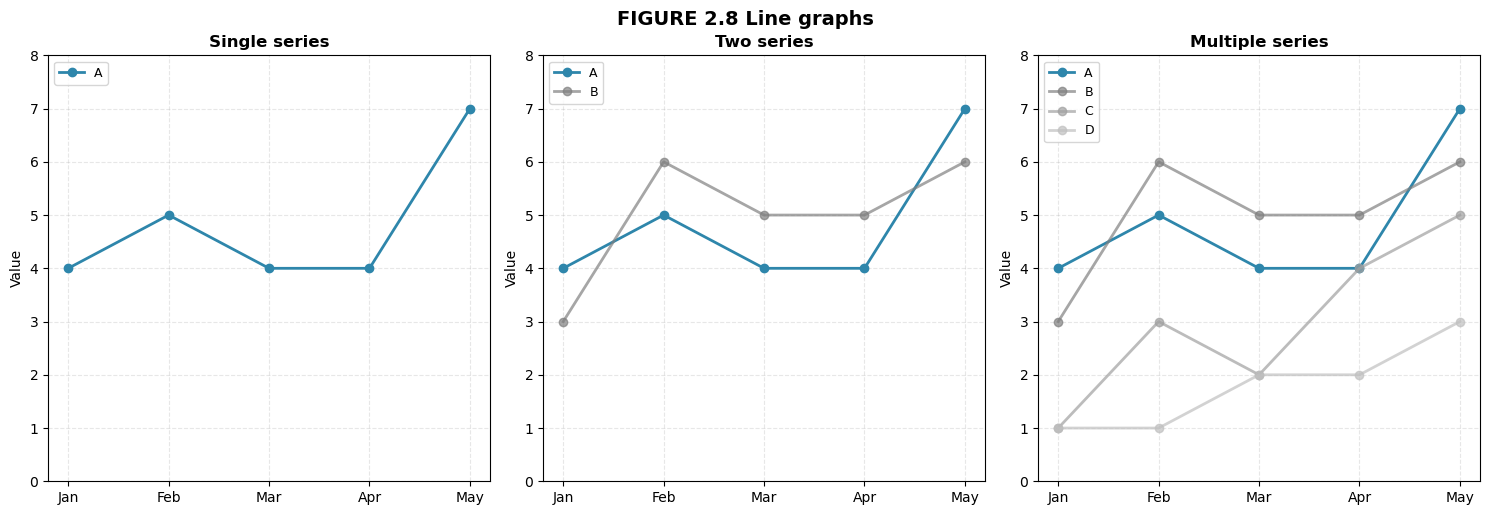

This graph reproduces Figure 2.8 from Storytelling With Data
It demonstrates how line graphs can show single, two, or multiple data series


In [170]:
# Reproducing Figure 2.8 from Storytelling With Data
# "Line graphs" showing single series, two series, and multiple series

import matplotlib.pyplot as plt
import numpy as np

# Data for the graphs
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
series_a = [4, 5, 4, 4, 7]
series_b = [3, 6, 5, 5, 6]
series_c = [1, 3, 2, 4, 5]
series_d = [1, 1, 2, 2, 3]

# Create figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Single series (left graph)
ax1 = axes[0]
ax1.plot(months, series_a, marker='o', color='#2E86AB', linewidth=2, markersize=6, label='A')
ax1.set_title('Single series', fontsize=12, fontweight='bold')
ax1.set_ylabel('Value', fontsize=10)
ax1.set_ylim(0, 8)
ax1.set_yticks(range(0, 9))
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(loc='upper left', fontsize=9)

# Two series (middle graph)
ax2 = axes[1]
ax2.plot(months, series_a, marker='o', color='#2E86AB', linewidth=2, markersize=6, label='A')
ax2.plot(months, series_b, marker='o', color='#808080', linewidth=2, markersize=6, label='B', linestyle='-', alpha=0.7)
ax2.set_title('Two series', fontsize=12, fontweight='bold')
ax2.set_ylabel('Value', fontsize=10)
ax2.set_ylim(0, 8)
ax2.set_yticks(range(0, 9))
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.legend(loc='upper left', fontsize=9)

# Multiple series (right graph)
ax3 = axes[2]
ax3.plot(months, series_a, marker='o', color='#2E86AB', linewidth=2, markersize=6, label='A')
ax3.plot(months, series_b, marker='o', color='#808080', linewidth=2, markersize=6, label='B', linestyle='-', alpha=0.7)
ax3.plot(months, series_c, marker='o', color='#A0A0A0', linewidth=2, markersize=6, label='C', linestyle='-', alpha=0.7)
ax3.plot(months, series_d, marker='o', color='#C0C0C0', linewidth=2, markersize=6, label='D', linestyle='-', alpha=0.7)
ax3.set_title('Multiple series', fontsize=12, fontweight='bold')
ax3.set_ylabel('Value', fontsize=10)
ax3.set_ylim(0, 8)
ax3.set_yticks(range(0, 9))
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.legend(loc='upper left', fontsize=9)

# Adjust layout and display
plt.tight_layout()
plt.suptitle('FIGURE 2.8 Line graphs', fontsize=14, fontweight='bold', y=1.02)
plt.show()

print("This graph reproduces Figure 2.8 from Storytelling With Data")
print("It demonstrates how line graphs can show single, two, or multiple data series")
